# Summary:

### We select only data from TargetScan

### there are 244389 miRNAs in total,
### 470 unique miRNA sequences,
### hsa-miR-608 is the most frequent in this set,
### and hsa-miR-608 is presented in the set 1837 times

### After dropping duplicates,
### there are 136597 miRNAs, 470 unique miRNAs, the most frequent one appears 992 times,
### and 136597 target mRNAs, 108248 unique targets, the most frequent one appears 12 times.
### Target lengths are either 43 or 44 nucleotides,
### microRNAs' lengths range between 17 and 28 with 22 as the most frequent value.

In [30]:
#targetscan.describe()

,miRNA,target
count,136597,136597
unique,470,108248
top,UGCCUCGACAGGGUUGUGGUGGGGA,UUCUUAGUGUUCUAUUUAUCUUAUUUGCUAAUGGGAGCACUUC
freq,992,12


In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [2]:
# raw data from the data base
rawtxt = pd.read_csv('miRNA_targets_hsa.txt',sep='\t',engine='c',error_bad_lines=False)

In [3]:
rawtxt

,mature miRNA,Ensembl transcript ID,target start,tsrget end,miRNA 3-5,alinment,target 5-3,tool name,criterion 1,criterion 2,criterion 3
0,hsa-let-7a,ENST00000344008,167,174,-------------------UUGAUAUGUUGGAU--GAUGGAGU,|| ||:| :|: ||||||||,GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC,TargetScan,3,1,1
1,hsa-let-7a,ENST00000377015,167,174,-------------------UUGAUAUGUUGGAU--GAUGGAGU,|| ||:| :|: ||||||||,GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC,TargetScan,3,1,0
2,hsa-let-7a,ENST00000374673,3606,3613,---------UUGAUAUGU---UGGAU---------GAUGGAGU,::||| ||: ||| |||||||:,UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG,TargetScan,2,2,0
3,hsa-let-7a,ENST00000374673,5007,5014,U--------------------UGAUAU--GUUGGAUGAUGGAGU,:||: |::|:| |||||||,CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUU-CUACCUCU,TargetScan,2,2,0
4,hsa-let-7a,ENST00000311538,3713,3720,---------UUGAUAUGU---UGGAU---------GAUGGAGU,::||| ||: ||| |||||||:,UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG,TargetScan,2,2,0
5,hsa-let-7a,ENST00000311538,5114,5121,U--------------------UGAUAU--GUUGGAUGAUGGAGU,:||: |::|:| |||||||,CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUU-CUACCUCU,TargetScan,2,2,1
6,hsa-let-7a,ENST00000374498,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,0
7,hsa-let-7a,ENST00000313298,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,0
8,hsa-let-7a,ENST00000374497,106,113,U----------UGAUA-UG--------UUGGAU--GAUGGAGU,:||: :| ::||| ||||||||,GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA,TargetScan,3,1,1
9,hsa-let-7a,ENST00000311772,264,271,UU---------------------GAUAUGUU-GGAUGAUGGAGU,||| :| || ||||||||,CAAUAGACUGCCCUGGCUCUUUCCUAGGCCUUCC-ACUACCUCC,TargetScan,3,1,1


In [4]:
# select only data from TargetScan
tarscan = rawtxt[rawtxt["tool name"]=="TargetScan"]

In [5]:
tarscan["mature miRNA"].describe()

count          244389
unique            470
top       hsa-miR-608
freq             1837
Name: mature miRNA, dtype: object

#So, we have 244389 miRNAs in total,
#470 unique miRNA sequences,
#hsa-miR-608 is the most frequent in this set,
#and hsa-miR-608 is presented in the set 1837 times

In [7]:
# eliminate empty positions in the alignment data
tarscan["miRNA"] = tarscan["miRNA 3-5"].apply(lambda x: x.replace('-',''))
tarscan["target"] = tarscan["target 5-3"].apply(lambda x: x.replace('-',''))

/home/kira/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
tarscan["target"]

0         GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC
1         GGGUGAUGUCCUUCUAGCCAAAGAUGCUGCUGCUCCUACCUCAC
2         UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG
3          CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUUCUACCUCU
4         UGUGCCCCCGGCUACACGCGCACCGGGAGUGGGCUCUACCUCGG
5          CUCAUCCCAGCCAUCACGACUGCUGACGCCGGCUUCUACCUCU
6         GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA
7         GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA
8         GCCCUGGAGCUGCUGGGGCCAAGCCAAGGCCUCCCCUACCUCAA
9          CAAUAGACUGCCCUGGCUCUUUCCUAGGCCUUCCACUACCUCC
10         CAAUAGACUGCCCUGGCUCUUUCCUAGGCCUUCCACUACCUCC
11        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
12        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
13        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
14        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
15        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
16        UUCCCCAUCUGUAAACUGUAGAUAUGACUACUGACCUACCUCGC
17         CGGGAGGCGGUCAGUGGCCUGGCAAAGAGCCGGGACUACCUCC
18        

In [10]:
# select only columns important for us, drop duplicated lines, save without indexes
shuffle(tarscan)[["miRNA","target"]].reset_index(drop=True).drop_duplicates().to_csv('targetscan.csv', index = False)

In [19]:
targetscan = pd.read_csv('targetscan.csv')

In [11]:
# analyze statistics of the sequencies' lengths
mirlen = []
genelen = []

for l in open('targetscan.csv', 'r'):
    #if count<3:
        (a, b) = l.strip().split(",")
        mirlen.append(len(a))
        genelen.append(len(b))

In [12]:
# drop the first lines with the column names
mirlen = mirlen[1:]
genelen = genelen[1:]

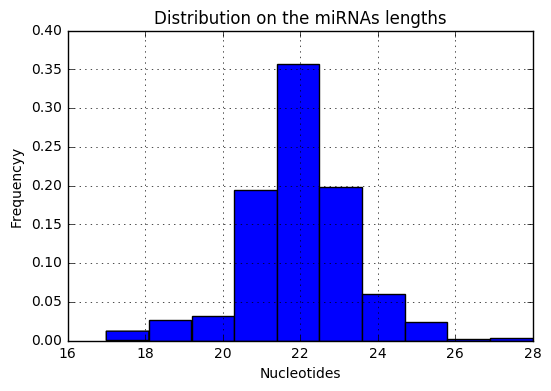

In [25]:
# plot the distribution on the miRNAs' lengths
import matplotlib
import matplotlib.pyplot as plt

x = mirlen
plt.hist(x,normed=True)
plt.xlabel('Nucleotides')
plt.ylabel('Frequency')
plt.title(r'Distribution on the miRNAs lengths')
plt.grid(True)
plt.show()

In [17]:
pd.Series(mirlen).unique()

array([20, 22, 21, 23, 26, 24, 18, 25, 19, 17, 28])

In [14]:
# how many microRNAs have such numbers of nucleotides
pd.Series(mirlen).value_counts()

22    53565
23    29792
21    29263
24     8983
20     4802
19     3989
25     3583
18     1250
17      565
28      418
26      387
dtype: int64

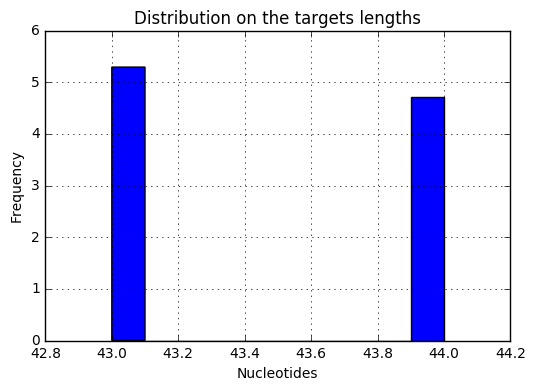

In [26]:
x = genelen
plt.hist(x,normed=True)
plt.xlabel('Nucleotides')
plt.ylabel('Frequency')
plt.title(r'Distribution on the targets lengths')
plt.grid(True)
plt.show()

In [16]:
pd.Series(genelen).value_counts()

43    72284
44    64313
dtype: int64

In [27]:
# after dropping duplicates
len(targetscan.miRNA)

136597

In [28]:
len(targetscan.target.unique())

108248

In [29]:
len(targetscan.miRNA.unique())

470

In [30]:
targetscan.describe()

,miRNA,target
count,136597,136597
unique,470,108248
top,UGCCUCGACAGGGUUGUGGUGGGGA,UUCUUAGUGUUCUAUUUAUCUUAUUUGCUAAUGGGAGCACUUC
freq,992,12
